### This project is to study the bank loan providing methods by studying previous users and current users.




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
 #pd.set_option('display.max_rows', None)

### Import Dataset

In [3]:
df_application = pd.read_csv('./application_data.csv')
df_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df_previous_application = pd.read_csv('./previous_application.csv') 

In [5]:
df_previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


### Data Cleaning of  datasets

#### Dataset 2 - "application_data.csv"

In [6]:
# Cleaning of application_data

In [7]:
# First, we need to find out the null values in dataframe
 
application_data_blank = df_application.isnull().sum() 

In [8]:
print(application_data_blank)

SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     6734
AMT_REQ_CREDIT_BUREAU_WEEK    6734
AMT_REQ_CREDIT_BUREAU_MON     6734
AMT_REQ_CREDIT_BUREAU_QRT     6734
AMT_REQ_CREDIT_BUREAU_YEAR    6734
Length: 122, dtype: int64


In [9]:
#Checking Percentage of Null Value's in dataframe using function 
 
def Missing_Values(dataframe): 
    return round((dataframe.isnull().sum()*100/len(dataframe)).sort_values(ascending = False),3)
 

In [10]:
Missing_Values(df_application)  # Missing value % of application data

COMMONAREA_MEDI             69.921
COMMONAREA_AVG              69.921
COMMONAREA_MODE             69.921
NONLIVINGAPARTMENTS_MODE    69.429
NONLIVINGAPARTMENTS_AVG     69.429
                             ...  
NAME_HOUSING_TYPE            0.000
NAME_FAMILY_STATUS           0.000
NAME_EDUCATION_TYPE          0.000
NAME_INCOME_TYPE             0.000
SK_ID_CURR                   0.000
Length: 122, dtype: float64

In [11]:
# Stored it in a variable which contains more than 50% missing values: 

Null=Missing_Values(df_application)[Missing_Values(df_application) > 50] 
Null

COMMONAREA_MEDI             69.921
COMMONAREA_AVG              69.921
COMMONAREA_MODE             69.921
NONLIVINGAPARTMENTS_MODE    69.429
NONLIVINGAPARTMENTS_AVG     69.429
NONLIVINGAPARTMENTS_MEDI    69.429
LIVINGAPARTMENTS_MODE       68.453
LIVINGAPARTMENTS_AVG        68.453
LIVINGAPARTMENTS_MEDI       68.453
FONDKAPREMONT_MODE          68.383
FLOORSMIN_AVG               67.789
FLOORSMIN_MODE              67.789
FLOORSMIN_MEDI              67.789
YEARS_BUILD_MEDI            66.479
YEARS_BUILD_MODE            66.479
YEARS_BUILD_AVG             66.479
OWN_CAR_AGE                 65.901
LANDAREA_MEDI               59.443
LANDAREA_MODE               59.443
LANDAREA_AVG                59.443
BASEMENTAREA_MEDI           58.399
BASEMENTAREA_AVG            58.399
BASEMENTAREA_MODE           58.399
EXT_SOURCE_1                56.345
NONLIVINGAREA_MODE          55.145
NONLIVINGAREA_AVG           55.145
NONLIVINGAREA_MEDI          55.145
ELEVATORS_MEDI              53.303
ELEVATORS_AVG       

In [12]:
# Dropping all those values since these have lots of missing data and it will disrupt the data: 
 
Null.index

Index(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE',
       'FLOORSMIN_AVG', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI', 'YEARS_BUILD_MEDI',
       'YEARS_BUILD_MODE', 'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'LANDAREA_MEDI',
       'LANDAREA_MODE', 'LANDAREA_AVG', 'BASEMENTAREA_MEDI',
       'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE', 'EXT_SOURCE_1',
       'NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI',
       'ELEVATORS_MEDI', 'ELEVATORS_AVG', 'ELEVATORS_MODE',
       'WALLSMATERIAL_MODE', 'APARTMENTS_MEDI', 'APARTMENTS_AVG',
       'APARTMENTS_MODE', 'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE',
       'LIVINGAREA_AVG', 'LIVINGAREA_MODE', 'LIVINGAREA_MEDI',
       'HOUSETYPE_MODE'],
      dtype='object')

In [13]:
df_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# Droping all the colums having missing values >50% 
 
df_application.drop(columns=Null.index ,inplace=True) 
df_application.head() 

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# Checking the missing values above 40%

Null_1 = Missing_Values(df_application)[Missing_Values(df_application)>40] 

In [16]:
Null_1

FLOORSMAX_AVG                   49.751
FLOORSMAX_MODE                  49.751
FLOORSMAX_MEDI                  49.751
YEARS_BEGINEXPLUATATION_AVG     48.789
YEARS_BEGINEXPLUATATION_MODE    48.789
YEARS_BEGINEXPLUATATION_MEDI    48.789
TOTALAREA_MODE                  48.297
EMERGENCYSTATE_MODE             47.397
dtype: float64

In [17]:
# Dropping the unnecessary columns from the datafame as they were not important
  
df_application.drop(columns=Null_1.index ,inplace=True) 
print('Null_1 dropped from the df_application') 

Null_1 dropped from the df_application


In [18]:
df_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# Finding the value count of AMT_ANNUITY 
 
df_application.AMT_ANNUITY.value_counts()

9000.0     1049
13500.0     896
6750.0      372
10125.0     336
37800.0     257
           ... 
80194.5       1
47871.0       1
14935.5       1
19539.0       1
70357.5       1
Name: AMT_ANNUITY, Length: 8807, dtype: int64

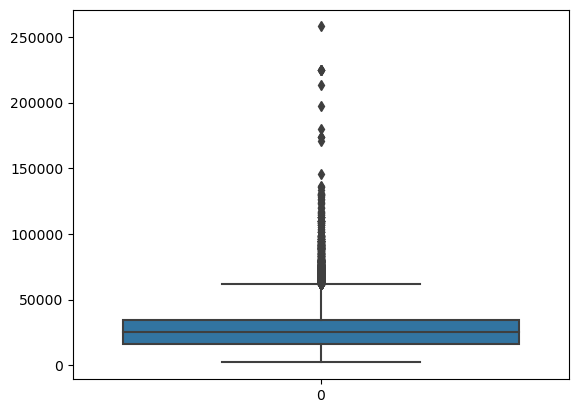

In [20]:
# Ploting a Box plot for AMT_ANNUITY to check the outliers 
 
sns.boxplot(df_application.AMT_ANNUITY) 
plt.show() 

In [21]:
# Finding the null value count
 
df_application.AMT_ANNUITY.median()

24939.0

In [22]:
# Replacing the null values with median of AMT_ANNUITY, as we have outliers hence using mean will not be a correct imputation technique
    
df_application['AMT_ANNUITY'] = df_application.AMT_ANNUITY.fillna(df_application.AMT_ANNUITY.median())


In [23]:
# Checking the value count of AMT_GOODS_PRICE
df_application.AMT_GOODS_PRICE.value_counts()

450000.0     4211
225000.0     4086
675000.0     4076
900000.0     2513
270000.0     1878
             ... 
862353.0        1
378598.5        1
482530.5        1
2173500.0       1
467874.0        1
Name: AMT_GOODS_PRICE, Length: 519, dtype: int64

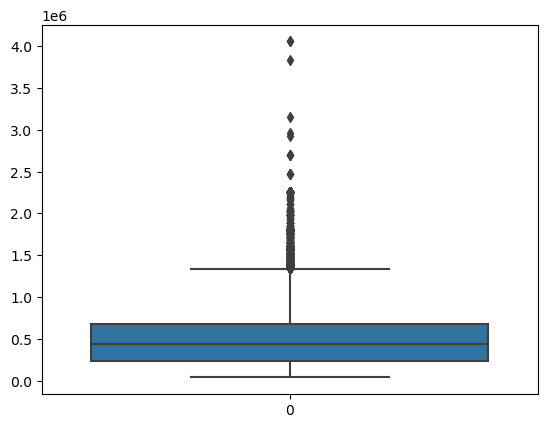

In [24]:
# Checking for outliers in AMT_GOODS_PRICE as it is a continuous variable

sns.boxplot(df_application['AMT_GOODS_PRICE'])
plt.show()


In [25]:
#Imputing null values with AMT_CREDIT based on the assumption that the amount of loan taken is equal to the amount of goods purchase:

df_application["AMT_GOODS_PRICE"] =df_application.AMT_GOODS_PRICE.fillna(df_application['AMT_GOODS_PRICE'] == df_application['AMT_CREDIT'])

In [26]:
# Calculating the null value count
df_application['NAME_TYPE_SUITE'].isna().sum()

192

In [27]:
# Replacing the null values by mode for this categorical variable

df_application["NAME_TYPE_SUITE"] = df_application.NAME_TYPE_SUITE.fillna("Unaccompanied")

In [28]:
# Checking null value counts for the variable

df_application.CNT_FAM_MEMBERS.isna().sum()

1

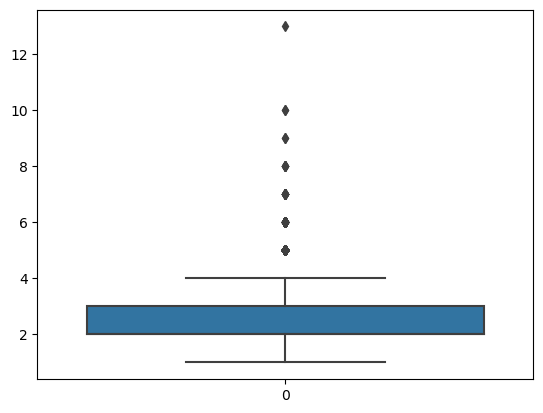

In [29]:
# Plotting boxplot for variable

sns.boxplot(df_application['CNT_FAM_MEMBERS'])
plt.show()


In [30]:
# This is a continuous variable and we can impute the mean/median inputting null values with Median due to the presence of outlier values:

df_application["CNT_FAM_MEMBERS"] = df_application.CNT_FAM_MEMBERS.fillna(df_application.CNT_FAM_MEMBERS.median())

In [31]:
# Percentage of each category present in "OCCUPATION_TYPE"
df_application["OCCUPATION_TYPE"].value_counts(normalize=True)*100

Laborers                 26.064929
Sales staff              15.024021
Core staff               12.910176
Managers                 10.158684
Drivers                   8.863008
High skill tech staff     5.392342
Accountants               4.719755
Medicine staff            4.085020
Security staff            3.319260
Cooking staff             2.803902
Cleaning staff            2.151696
Private service staff     1.301499
Low-skill Laborers        1.039453
Waiters/barmen staff      0.663852
Secretaries               0.617266
Realty agents             0.358131
HR staff                  0.294075
IT staff                  0.232931
Name: OCCUPATION_TYPE, dtype: float64

In [32]:
# Finding the null value count
df_application.OCCUPATION_TYPE.isnull().sum()

15654

In [33]:
# Imputing null values with "Unknown" as using mode may distort the picture because of presence of large number of null values
df_application["OCCUPATION_TYPE"] = df_application.OCCUPATION_TYPE.fillna("Unknown")

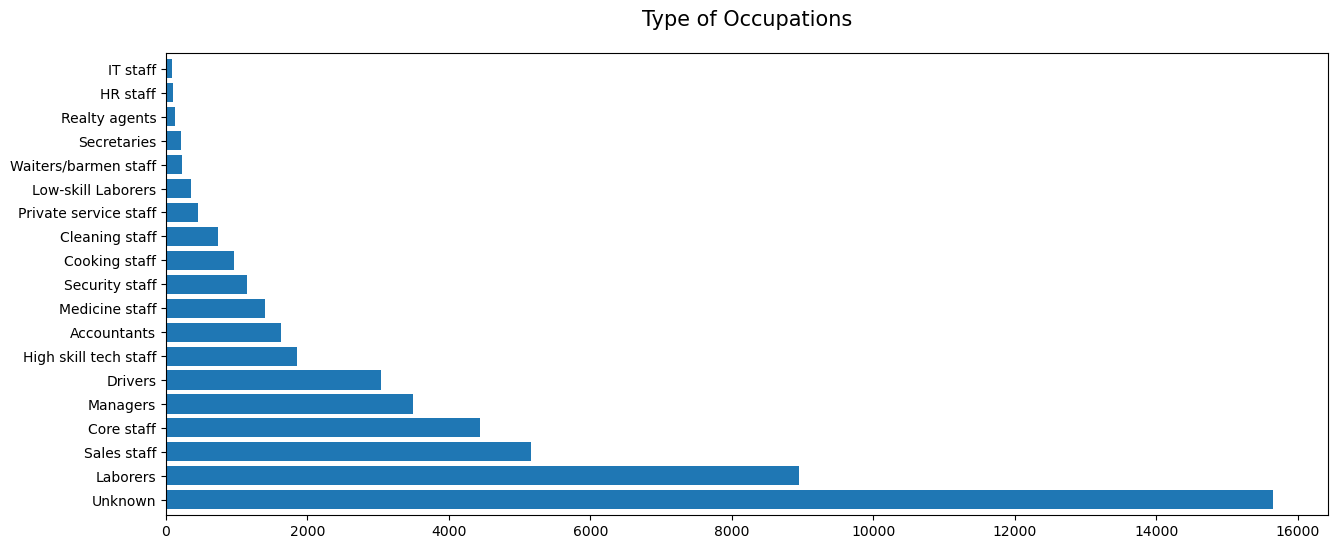

In [34]:
#Plotting a bar graph for the variable Occupation Type to understand the distribution by various occupations

plt.figure(figsize = [15,6])
df_application.OCCUPATION_TYPE.value_counts().plot.barh(width =.8)
plt.title("Type of Occupations", fontdict={"fontsize":15}, pad =20)
plt.show()

In [35]:
# Computing statistics for various numerical variables of number of queries to Credit Bureau about the client to understand their distribution

df_application[["AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT",
                "AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_DAY",
                "AMT_REQ_CREDIT_BUREAU_HOUR"]].describe()

,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR
count,43265.000000,43265.000000,43265.000000,43265.000000,43265.000000,43265.000000
mean,1.881035,0.260973,0.270288,0.032382,0.007512,0.007096
std,1.865054,0.606996,0.928560,0.194080,0.107992,0.087709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,8.000000,24.000000,6.000000,6.000000,3.000000


In [36]:
# Making a list of all variables pertaining to number of queries to Credit Bureau about the client:
AMT_REQ_CREDIT = ["AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT",
                  "AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK",
                  "AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR"]


In [ ]:
# Replacing the missing values with median values for the Credit Bureau list above

df_application.fillna(df_application[AMT_REQ_CREDIT].median(),inplace = True)


In [ ]:
# Computing statistics for various numerical variables pertaining to client’s social surroundings
df_application[['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
                'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']].describe()

In [ ]:
# Making a list of all variables pertaining to client's social surroundings
SOCIAL_CIRCLE = ['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
                 'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']

In [37]:
# Replacing the missing values with median values for the social surroundings list as above

df_application.fillna(df_application[SOCIAL_CIRCLE].median(),inplace= True)

NameError: name 'SOCIAL_CIRCLE' is not defined

In [38]:
# Finding the values for two variables of external sources

df_application[['EXT_SOURCE_2','EXT_SOURCE_3']]

,EXT_SOURCE_2,EXT_SOURCE_3
0,0.262949,0.139376
1,0.622246,NaN
2,0.555912,0.729567
3,0.650442,NaN
4,0.322738,NaN
...,...,...
49994,0.493770,0.634706
49995,0.722218,0.454321
49996,0.296144,0.579727
49997,0.376628,0.320163


In [39]:
# Computing statistics for the columns pertaining to external sources

df_application[['EXT_SOURCE_2','EXT_SOURCE_3']].describe()

,EXT_SOURCE_2,EXT_SOURCE_3
count,4.987300e+04,40055.000000
mean,5.138236e-01,0.511881
std,1.911650e-01,0.194700
min,8.170000e-08,0.000527
25%,3.917225e-01,0.370650
50%,5.655854e-01,0.535276
75%,6.634023e-01,0.669057
max,8.549997e-01,0.896010


In [40]:
# Replacing the missing values with median values for external source variable

df_application['EXT_SOURCE_2'] = df_application.EXT_SOURCE_2.fillna(df_application['EXT_SOURCE_2'].median())

In [41]:
# Replacing the missing values with median values for external source variable

df_application['EXT_SOURCE_3'] = df_application.EXT_SOURCE_3.fillna(df_application['EXT_SOURCE_3'].median())

In [42]:
# Computing various statistics for the variable to understand about the values

df_application.DAYS_LAST_PHONE_CHANGE.describe()

count    49998.000000
mean      -964.296172
std        829.485574
min      -4002.000000
25%      -1573.000000
50%       -755.000000
75%       -270.000000
max          0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [43]:
# Finding the counts for various values of the variable

df_application.DAYS_LAST_PHONE_CHANGE.value_counts(normalize=True)

 0.0       0.122885
-1.0       0.009000
-2.0       0.007520
-3.0       0.006360
-4.0       0.004440
             ...   
-3325.0    0.000020
-2826.0    0.000020
-3353.0    0.000020
-2673.0    0.000020
-3125.0    0.000020
Name: DAYS_LAST_PHONE_CHANGE, Length: 3412, dtype: float64

In [44]:
# Imputing missing values with 0 which is the most occuring value 

df_application['DAYS_LAST_PHONE_CHANGE'] = df_application.DAYS_LAST_PHONE_CHANGE.fillna(0)

#### Dataset 2 - "previous_application.csv"

In [45]:
# Cleaning of previous_application

In [46]:
#First, we find out the null values in dataframe

df_previous_application.isnull().sum()

SK_ID_PREV                         0
SK_ID_CURR                         0
NAME_CONTRACT_TYPE                 0
AMT_ANNUITY                    10592
AMT_APPLICATION                    0
AMT_CREDIT                         0
AMT_DOWN_PAYMENT               25198
AMT_GOODS_PRICE                10744
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
FLAG_LAST_APPL_PER_CONTRACT        0
NFLAG_LAST_APPL_IN_DAY             0
RATE_DOWN_PAYMENT              25198
RATE_INTEREST_PRIMARY          49834
RATE_INTEREST_PRIVILEGED       49834
NAME_CASH_LOAN_PURPOSE             0
NAME_CONTRACT_STATUS               0
DAYS_DECISION                      0
NAME_PAYMENT_TYPE                  0
CODE_REJECT_REASON                 0
NAME_TYPE_SUITE                24243
NAME_CLIENT_TYPE                   0
NAME_GOODS_CATEGORY                0
NAME_PORTFOLIO                     0
NAME_PRODUCT_TYPE                  0
CHANNEL_TYPE                       0
SELLERPLACE_AREA                   0
N

In [47]:
# Finding the percentage of null values for all variables

Missing_Values(df_previous_application)

RATE_INTEREST_PRIVILEGED       99.670
RATE_INTEREST_PRIMARY          99.670
RATE_DOWN_PAYMENT              50.397
AMT_DOWN_PAYMENT               50.397
NAME_TYPE_SUITE                48.487
NFLAG_INSURED_ON_APPROVAL      38.321
DAYS_FIRST_DRAWING             38.321
DAYS_FIRST_DUE                 38.321
DAYS_LAST_DUE_1ST_VERSION      38.321
DAYS_LAST_DUE                  38.321
DAYS_TERMINATION               38.321
AMT_GOODS_PRICE                21.488
AMT_ANNUITY                    21.184
CNT_PAYMENT                    21.184
PRODUCT_COMBINATION             0.016
CHANNEL_TYPE                    0.000
NAME_PRODUCT_TYPE               0.000
NAME_YIELD_GROUP                0.000
SELLERPLACE_AREA                0.000
NAME_SELLER_INDUSTRY            0.000
NAME_GOODS_CATEGORY             0.000
NAME_PORTFOLIO                  0.000
SK_ID_PREV                      0.000
NAME_CLIENT_TYPE                0.000
CODE_REJECT_REASON              0.000
SK_ID_CURR                      0.000
DAYS_DECISIO

In [48]:
# Finding all the variables with null value % >50%
Null_2 =Missing_Values(df_previous_application)[Missing_Values(df_previous_application) > 50]

Null_2

RATE_INTEREST_PRIVILEGED    99.670
RATE_INTEREST_PRIMARY       99.670
RATE_DOWN_PAYMENT           50.397
AMT_DOWN_PAYMENT            50.397
dtype: float64

In [49]:
#Retrieving Variable names with null values >50%

Null_2.index

Index(['RATE_INTEREST_PRIVILEGED', 'RATE_INTEREST_PRIMARY',
       'RATE_DOWN_PAYMENT', 'AMT_DOWN_PAYMENT'],
      dtype='object')

In [50]:
# Dropping the unnecessary columns from the data fame as they are not important

df_previous_application.drop(columns=Null_2.index ,inplace=True)

print('Null_2 dropped from the df_previous_application')

Null_2 dropped from the df_previous_application


In [51]:
# Finding the percentage of null values for other variables

Missing_Values(df_previous_application)

NAME_TYPE_SUITE                48.487
DAYS_FIRST_DRAWING             38.321
DAYS_TERMINATION               38.321
DAYS_LAST_DUE                  38.321
DAYS_LAST_DUE_1ST_VERSION      38.321
DAYS_FIRST_DUE                 38.321
NFLAG_INSURED_ON_APPROVAL      38.321
AMT_GOODS_PRICE                21.488
AMT_ANNUITY                    21.184
CNT_PAYMENT                    21.184
PRODUCT_COMBINATION             0.016
WEEKDAY_APPR_PROCESS_START      0.000
HOUR_APPR_PROCESS_START         0.000
NAME_CONTRACT_TYPE              0.000
AMT_APPLICATION                 0.000
AMT_CREDIT                      0.000
NAME_YIELD_GROUP                0.000
NAME_SELLER_INDUSTRY            0.000
SELLERPLACE_AREA                0.000
CHANNEL_TYPE                    0.000
NAME_PRODUCT_TYPE               0.000
NAME_PORTFOLIO                  0.000
NAME_GOODS_CATEGORY             0.000
NAME_CLIENT_TYPE                0.000
SK_ID_CURR                      0.000
CODE_REJECT_REASON              0.000
NAME_PAYMENT

In [52]:
#  Finding the count of various values for the variable

df_previous_application.NAME_TYPE_SUITE.value_counts()

Unaccompanied      15195
Family              6581
Spouse, partner     2098
Children             993
Other_B              551
Other_A              262
Group of people       76
Name: NAME_TYPE_SUITE, dtype: int64

In [53]:
# Imputing null values with mode

df_previous_application['NAME_TYPE_SUITE'] = df_previous_application.NAME_TYPE_SUITE.fillna('Unaccompanied')

In [54]:
# Imputing null values with AMT_CREDIT based on the assumption that the amount of good purchased is equal to the loan amount

df_previous_application["AMT_GOODS_PRICE"] = df_previous_application.AMT_GOODS_PRICE.fillna(df_previous_application['AMT_GOODS_PRICE'] == df_previous_application['AMT_CREDIT'])


In [55]:
# Imputing null values with median

df_previous_application['AMT_ANNUITY'] = df_previous_application.AMT_ANNUITY.fillna(df_previous_application.AMT_ANNUITY.median())

In [56]:
# Finding value counts for various product combinations

df_previous_application.PRODUCT_COMBINATION.value_counts()

POS household with interest       8510
Cash                              7939
POS mobile with interest          7029
Cash X-Sell: middle               3953
Cash X-Sell: low                  3539
Card Street                       3323
POS industry with interest        3231
POS household without interest    2799
Card X-Sell                       2302
Cash Street: high                 1752
Cash X-Sell: high                 1657
Cash Street: low                  1056
Cash Street: middle                960
POS mobile without interest        731
POS other with interest            728
POS industry without interest      390
POS others without interest         92
Name: PRODUCT_COMBINATION, dtype: int64

In [57]:
# Imputing NA values with mode

df_previous_application['PRODUCT_COMBINATION'] = (df_previous_application.PRODUCT_COMBINATION.fillna(df_previous_application.PRODUCT_COMBINATION.mode()[0]))

In [58]:
# Imputing null values with median
df_previous_application['CNT_PAYMENT'] = df_previous_application.CNT_PAYMENT.fillna(df_previous_application.CNT_PAYMENT.median())

In [59]:
# Finding values greater than 40% of null values

Missing_Values(df_previous_application)

NFLAG_INSURED_ON_APPROVAL      38.321
DAYS_TERMINATION               38.321
DAYS_LAST_DUE                  38.321
DAYS_LAST_DUE_1ST_VERSION      38.321
DAYS_FIRST_DUE                 38.321
DAYS_FIRST_DRAWING             38.321
NAME_CLIENT_TYPE                0.000
PRODUCT_COMBINATION             0.000
NAME_YIELD_GROUP                0.000
CNT_PAYMENT                     0.000
NAME_SELLER_INDUSTRY            0.000
SELLERPLACE_AREA                0.000
CHANNEL_TYPE                    0.000
NAME_PRODUCT_TYPE               0.000
NAME_PORTFOLIO                  0.000
NAME_GOODS_CATEGORY             0.000
SK_ID_PREV                      0.000
SK_ID_CURR                      0.000
CODE_REJECT_REASON              0.000
NAME_PAYMENT_TYPE               0.000
DAYS_DECISION                   0.000
NAME_CONTRACT_STATUS            0.000
NAME_CASH_LOAN_PURPOSE          0.000
NFLAG_LAST_APPL_IN_DAY          0.000
FLAG_LAST_APPL_PER_CONTRACT     0.000
HOUR_APPR_PROCESS_START         0.000
WEEKDAY_APPR

### Standardizing Numerical values,changing data types and Creating buckets

#### Dataset 1 - "application_data.csv"

In [60]:
# Converting Days to Years to improve Readability

df_application[["DAYS_BIRTH", "DAYS_EMPLOYED","DAYS_REGISTRATION",
                "DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]] = abs(df_application[["DAYS_BIRTH", "DAYS_EMPLOYED",
                                                                                   "DAYS_REGISTRATION", "DAYS_ID_PUBLISH",
                                                                                   "DAYS_LAST_PHONE_CHANGE"]])

In [61]:
# Converting days to years up to 2 decimal places

df_application['AGE_IN_YEARS'] = round(df_application['DAYS_BIRTH']/365,2)

df_application['EMPLOYMENT_YEARS'] = round(df_application['DAYS_EMPLOYED']/365,2)

In [62]:
# Creating a Bucket for age:
df_application['AGE_IN_YEARS_RANGE'] = pd.cut(df_application['AGE_IN_YEARS'],
                                              bins=[0,20,25,30,35,40,45,50,55,60,65,70],
                                              labels=["0-20",'20-25','25-30','30-35','35-40','40-45',
                                                      '45-50','50-55','55-60','60-65','above 65'])


In [63]:
df_application[['AGE_IN_YEARS_RANGE','AGE_IN_YEARS']]

,AGE_IN_YEARS_RANGE,AGE_IN_YEARS
0,25-30,25.92
1,45-50,45.93
2,50-55,52.18
3,50-55,52.07
4,50-55,54.61
...,...,...
49994,25-30,29.22
49995,55-60,55.37
49996,25-30,28.16
49997,60-65,64.34


In [64]:
# Creating a Bucket for Employment years

df_application['EMPLOYMENT_YEARS_RANGE'] = pd.cut(df_application['EMPLOYMENT_YEARS'],
                                                  bins=[0,5,10,15,20,25,30,35,40,45,50,55],
                                                  labels=["0-5",'5-10','10-15','15-20','20-25','25-30','30-35',
                                                          '35-40','40-45','45-50','above 50'])


In [65]:
df_application[['EMPLOYMENT_YEARS_RANGE','EMPLOYMENT_YEARS']]

,EMPLOYMENT_YEARS_RANGE,EMPLOYMENT_YEARS
0,0-5,1.75
1,0-5,3.25
2,0-5,0.62
3,5-10,8.33
4,5-10,8.32
...,...,...
49994,0-5,0.78
49995,10-15,12.74
49996,0-5,3.17
49997,5-10,5.98


In [66]:
# Converting to lakhs up to 2 decimal places

df_application['AMT_INCOME_TOTAL_in_lakhs'] = round(df_application['AMT_INCOME_TOTAL']/100000,2)

df_application['AMT_CREDIT_in_lakhs'] = round(df_application['AMT_CREDIT']/100000,2)

In [67]:
# Creating buckets

df_application['AMT_CREDIT_in_lakhs_Range'] = pd.cut(df_application['AMT_CREDIT_in_lakhs'],
                                                     bins =[0,5,10,15,20,25,30,35,40,45], 
                                                     labels = ['0-5L','5-10L','10-15L','15-20L','20-25L',
                                                               '25-30L','30-35L','35-40L','Above 40L'])


In [68]:
df_application[['AMT_CREDIT_in_lakhs','AMT_INCOME_TOTAL_in_lakhs','AMT_CREDIT_in_lakhs_Range','AMT_CREDIT_in_lakhs']]

,AMT_CREDIT_in_lakhs,AMT_INCOME_TOTAL_in_lakhs,AMT_CREDIT_in_lakhs_Range,AMT_CREDIT_in_lakhs
0,4.07,2.02,0-5L,4.07
1,12.94,2.70,10-15L,12.94
2,1.35,0.68,0-5L,1.35
3,3.13,1.35,0-5L,3.13
4,5.13,1.22,5-10L,5.13
...,...,...,...,...
49994,12.06,1.80,10-15L,12.06
49995,11.25,1.26,10-15L,11.25
49996,9.00,1.12,5-10L,9.00
49997,8.21,2.70,5-10L,8.21


In [69]:
# Creating a Bucket for AMT_INCOME_TOTAL

df_application['AMT_INCOME_TOTAL_RANGE'] = pd.cut(df_application['AMT_INCOME_TOTAL_in_lakhs'],
                                                  bins =[0,1,2,3,4,5,6,7,8,9,10,100],
                                                  labels = ['0-1L','1-2L','2-3L','3-4L','4-5L','5-6L',
                                                            '6-7L','7-8L','8-9L','9-10L','Above 10L'])


In [70]:
df_application[['AMT_INCOME_TOTAL_RANGE','AMT_INCOME_TOTAL']]

,AMT_INCOME_TOTAL_RANGE,AMT_INCOME_TOTAL
0,2-3L,202500.0
1,2-3L,270000.0
2,0-1L,67500.0
3,1-2L,135000.0
4,1-2L,121500.0
...,...,...
49994,1-2L,180000.0
49995,1-2L,126000.0
49996,1-2L,112500.0
49997,2-3L,270000.0


In [71]:
# Finding the count of various values

df_application[['AMT_INCOME_TOTAL_RANGE','AMT_INCOME_TOTAL_in_lakhs']].value_counts()

AMT_INCOME_TOTAL_RANGE  AMT_INCOME_TOTAL_in_lakhs
1-2L                    1.35                         5859
                        1.12                         4984
                        1.58                         4299
                        1.80                         4051
0-1L                    0.90                         3566
                                                     ... 
2-3L                    2.53                            1
                        2.54                            1
                        2.55                            1
                        2.62                            1
Above 10L               38.25                           1
Length: 376, dtype: int64

In [72]:
# Removing rogue outlier values to prevent distortions in analysis

df_application['EMPLOYMENT_YEARS'] = df_application.EMPLOYMENT_YEARS.replace(df_application.EMPLOYMENT_YEARS.max(),np.NaN)

In [73]:
# Adding a column to understand the ratio

df_application['Credit_Ratio'] = round(df_application.AMT_CREDIT/df_application.AMT_INCOME_TOTAL,2)
df_application['Credit_Ratio'].head()

0    2.01
1    4.79
2    2.00
3    2.32
4    4.22
Name: Credit_Ratio, dtype: float64

#### Dataset 2 - "previous_application.csv"

In [74]:
# Converting to lakhs

df_previous_application['AMT_ANNUITY_LAKHS'] = df_previous_application['AMT_ANNUITY']/100000

df_previous_application['AMT_APPLICATION_LAKHS'] =df_previous_application['AMT_APPLICATION']/100000

df_previous_application['AMT_CREDIT_LAKHS'] = df_previous_application['AMT_CREDIT']/100000

In [75]:
# Converting days to absolute number

df_previous_application[['DAYS_DECISION','DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE',
                         'DAYS_TERMINATION']] =abs(df_previous_application[['DAYS_DECISION','DAYS_FIRST_DRAWING', 
                                                                            'DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION',
                                                                            'DAYS_LAST_DUE','DAYS_TERMINATION']])

In [76]:
# Converting days to years up to 2 decimal places

df_previous_application[['DAYS_DECISION_YEARS','DAYS_FIRST_DRAWING_YEARS','DAYS_FIRST_DUE_YEARS',
                         'DAYS_LAST_DUE_1ST_VERSION_YEARS','DAYS_LAST_DUE_YEARS',
                         'DAYS_TERMINATION_YEARS']] = round(df_previous_application[['DAYS_DECISION','DAYS_FIRST_DRAWING', 
                                                                                     'DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION',
                                                                                     'DAYS_LAST_DUE','DAYS_TERMINATION']]/365,2)

In [77]:
# Creating various buckets

df_previous_application['AMT_CREDIT_LAKHS_Range']=pd.cut(df_application['AMT_INCOME_TOTAL_in_lakhs'],
                                                         bins =[0,1,2,3,4,5,6,7,8,9,10,100], 
                                                         labels = ['0-1L','1-2L','2-3L','3-4L','4-5L','5-6L',
                                                                   '6-7L','7-8L','8-9L','9-10L','Above 10L'])

df_previous_application['AMT_APPLICATION_LAKHS_Range'] =pd.cut(df_application['AMT_INCOME_TOTAL_in_lakhs'],
                                                               bins =[0,1,2,3,4,5,6,7,8,9,10,100],
                                                               labels = ['0-1L','1-2L','2-3L','3-4L','4-5L','5-6L',
                                                                         '6-7L','7-8L','8-9L','9-10L','Above 10L'])


In [78]:
# df_previous_application.head()

In [79]:
# Making a list of all the flag variables

list_Flag = ['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL']

In [80]:
list_Flag

['FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL']

In [81]:
# Conversion of 0 to No and 1 to Yes for Flag variables for better understanding of the variables

df_application['FLAG_MOBIL'] = df_application['FLAG_MOBIL'].apply(lambda x : 'YES' if x == 1 else 'NO')

df_application['FLAG_EMP_PHONE'] = df_application['FLAG_EMP_PHONE'].apply(lambda x : 'YES' if x == 1 else 'NO')

df_application['FLAG_WORK_PHONE'] = df_application['FLAG_WORK_PHONE'].apply(lambda x : 'YES' if x == 1else 'NO')

df_application['FLAG_CONT_MOBILE'] =df_application['FLAG_CONT_MOBILE'].apply(lambda x : 'YES' if x == 1else 'NO')

df_application['FLAG_PHONE'] =df_application['FLAG_PHONE'].apply(lambda x : 'YES' if x == 1 else'NO')

df_application['FLAG_EMAIL'] =df_application['FLAG_EMAIL'].apply(lambda x : 'YES' if x == 1 else 'NO')

## Analysis of Variables

- Univariate Analysis:

 For dataset "application_data.csv"


In [82]:
Numarical_Data = ['AMT_ANNUITY','AMT_GOODS_PRICE','AGE_IN_YEARS','EMPLOYMENT_YEARS','AMT_INCOME_TOTAL_in_lakhs',
                  'AMT_CREDIT_in_lakhs','CNT_FAM_MEMBERS','Credit_Ratio']

In [83]:
Categorical_Data = ['FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                    'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','AGE_IN_YEARS_RANGE',
                    'EMPLOYMENT_YEARS_RANGE','AMT_CREDIT_in_lakhs_Range','AMT_INCOME_TOTAL_RANGE']

In [84]:
# sns.histplot(df["flipper_length_mm"], kde=True, stat="density")

In [85]:
def Uni_Analysis_Numarical(dataframe, column):
 sns.set(style='darkgrid')
 plt.figure(figsize=(25, 5))
 plt.subplot(1, 3, 1)
 sns.boxplot(data=dataframe, orient='h', x=column).set(title='Box Plot')
 plt.subplot(1, 3, 2)
 sns.histplot(dataframe[column].dropna(),kde = True, stat="density").set(title='Histplot')

 plt.show()

In [86]:
# Uni_Analysis_Numarical(df_application, column)

In [87]:
def Uni_Analysis_Categorcal(dataframe, column):
 sns.set(style='darkgrid')
 plt.figure(figsize = [12,5])
 dataframe[column].value_counts().plot.barh(width = 0.8)
 plt.title(column)
 plt.show()

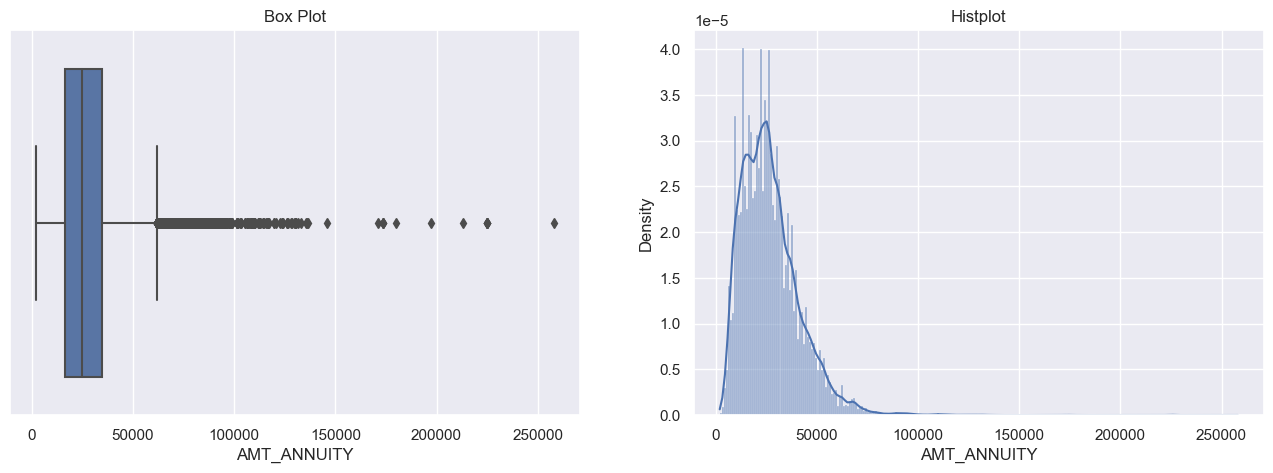

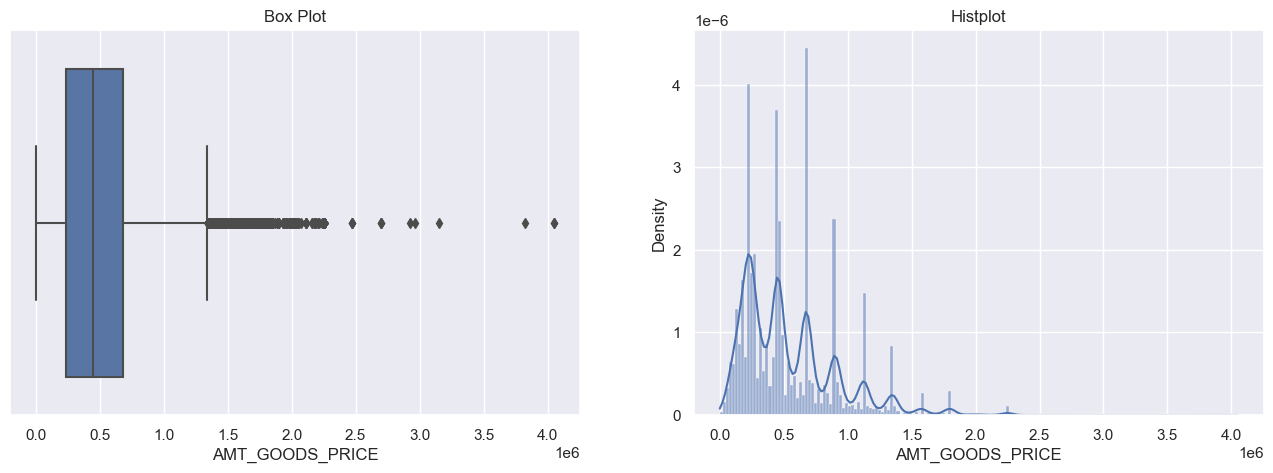

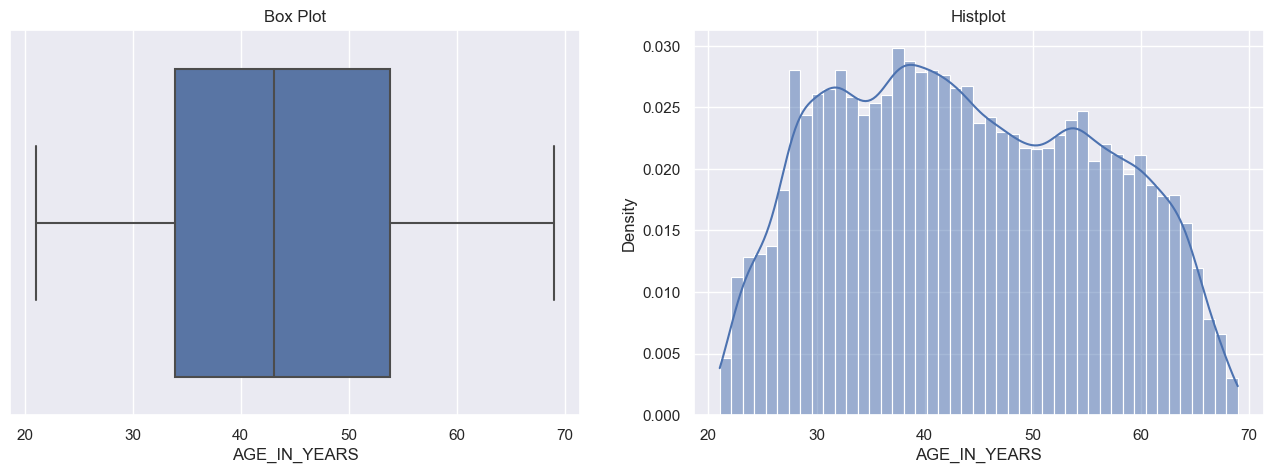

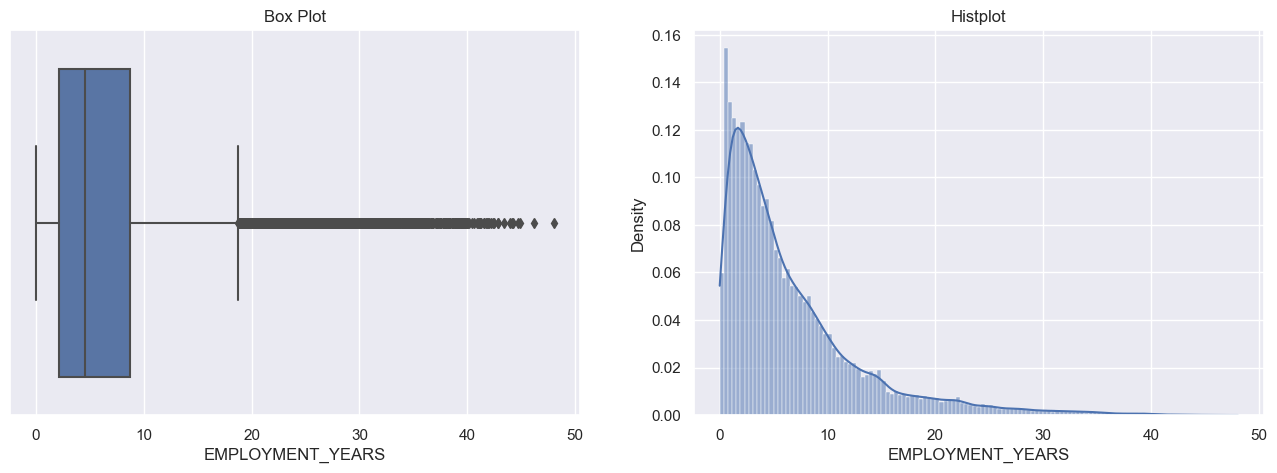

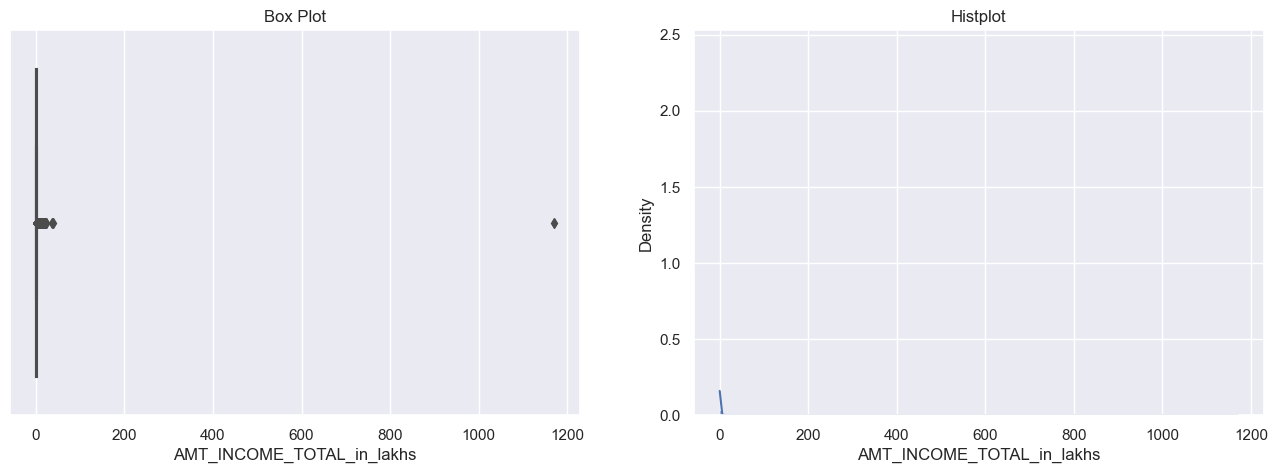

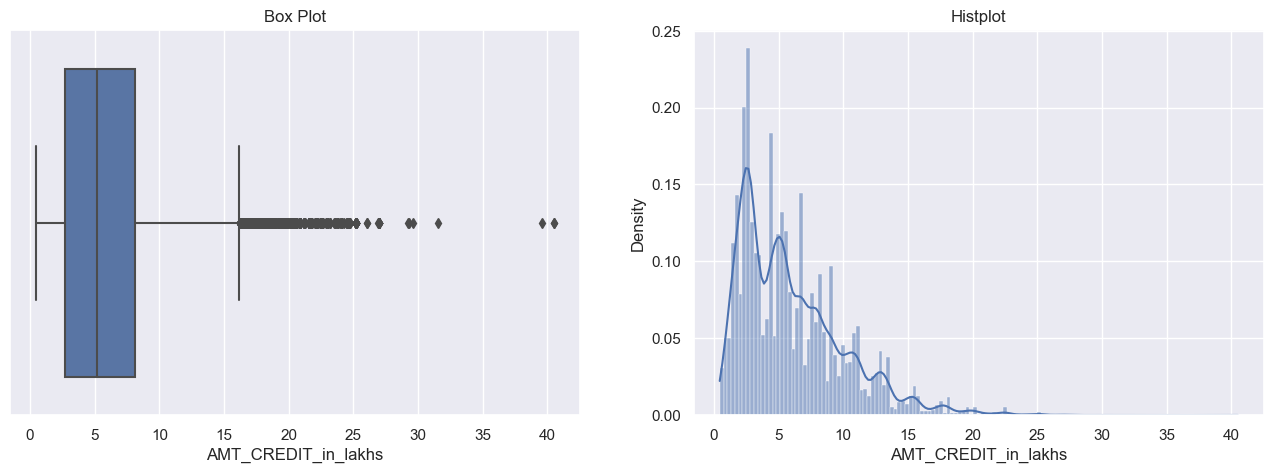

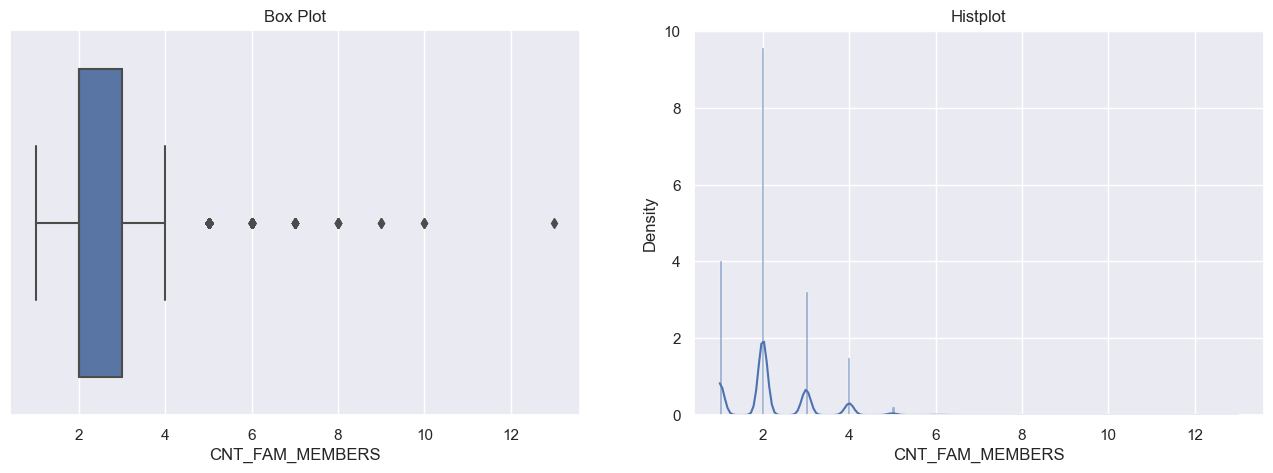

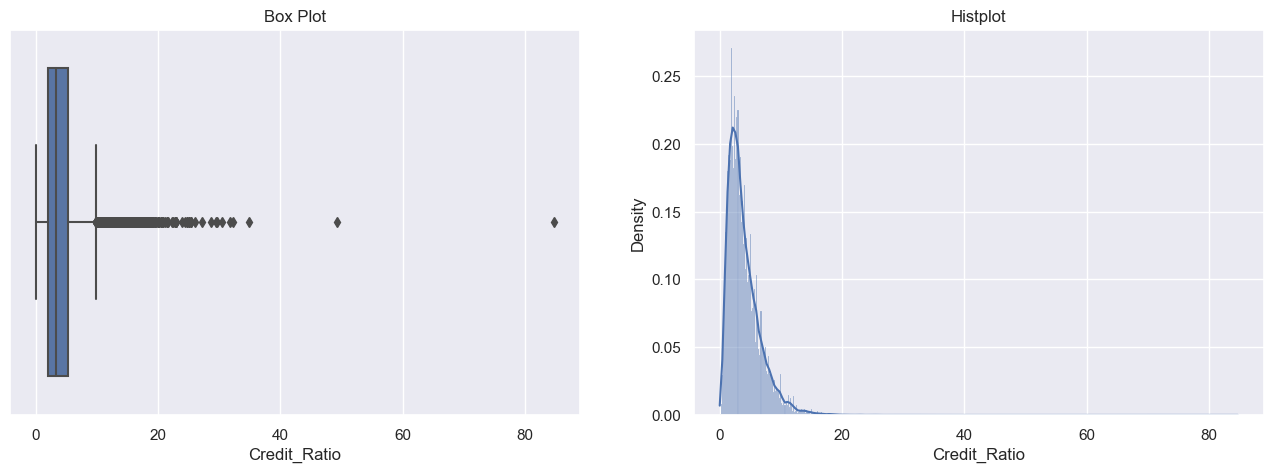

In [88]:
for i in Numarical_Data:
 Uni_Analysis_Numarical(df_application,i)

In [ ]:
for i in Categorical_Data:
 Uni_Analysis_Categorcal(df_application,i)

In [ ]:
sns.set(style='darkgrid')
plt.figure(figsize = [15,12])

df_application['ORGANIZATION_TYPE'].value_counts().plot.barh(width = 1)
plt.title('ORGANIZATION_TYPE')

plt.show()

Dataset for "previous_application.csv"

In [ ]:
Categorical_Data_for_prev =['NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE',
                            'NAME_TYPE_SUITE','NAME_CLIENT_TYPE','AMT_CREDIT_LAKHS_Range','AMT_APPLICATION_LAKHS_Range',]

In [ ]:
for i in Categorical_Data_for_prev:
   Uni_Analysis_Categorcal(df_previous_application,i)

## TARGET Analysis

- Univariate Analysis of TARGET

In [ ]:
Categorical_Data_1 = ['NAME_CONTRACT_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE',
                      'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE',
                      'AGE_IN_YEARS_RANGE','EMPLOYMENT_YEARS_RANGE','AMT_CREDIT_in_lakhs_Range','AMT_INCOME_TOTAL_RANGE']


In [ ]:
Numarical_Data_1 = ['AMT_ANNUITY','AMT_GOODS_PRICE','CNT_FAM_MEMBERS','CNT_CHILDREN','Credit_Ratio']

In [ ]:
Tagget_Variable_Payment_Difficulty = df_application[df_application.TARGET == 1]

In [ ]:
Tagget_Variable_All_Other = df_application[df_application.TARGET == 0]

In [ ]:
Tagget_Variable_All_Other.CODE_GENDER.value_counts()

In [ ]:
# Function to plot for categorical variables

def Tagget_categorical_Uni(variable):
    plt.style.use('classic')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(25,8))


    sns.countplot(x=variable,data=Tagget_Variable_Payment_Difficulty,linewidth=1,
              ax=ax1,edgecolor=sns.color_palette("dark", 3),hue =variable )
    ax1.set_ylabel('Total Counts')
    ax1.set_title(f'Distribution of {variable} TaggetPayment_Difficulty',fontsize=18)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
               
               
    for p in ax1.patches:
        ax1.annotate('{:.1f}%'.format((p.get_height()/len(Tagget_Variable_Payment_Difficulty))*100),
               (p.get_x()+0.4, p.get_height()+100), ha='center')

               
    sns.countplot(x=variable,data=Tagget_Variable_All_Other,ax=ax2,linewidth=1,
              edgecolor=sns.color_palette("dark", 3),hue =variable )
    ax2.set_ylabel('Total Counts')
    ax2.set_title(f'Distribution of {variable} Tagget All_Other',fontsize =18,)
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")

               
    for p in ax2.patches:
        ax2.annotate('{:.1f}%'.format((p.get_height()/len(Tagget_Variable_All_Other))*100),
             (p.get_x()+0.4, p.get_height()+100), ha='center')

               
plt.show()

Tagget_categorical_Uni('CODE_GENDER')


In [ ]:
for i in Categorical_Data_1:
    Tagget_categorical_Uni(i)

In [ ]:
# Function to plot for categorical variables

def Tagget_Numarical_Uni(variable):

    sns.set(style='darkgrid')
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(Tagget_Variable_Payment_Difficulty[variable].dropna(),kde = True, stat="density")
    plt.title(f'Distribution of {variable} Payment_Difficulty',fontsize=15)
    plt.xlabel(variable)

    plt.subplot(1, 2, 2)
    sns.histplot(Tagget_Variable_All_Other[variable].dropna(),kde = True, stat="density")
    plt.title(f'Distribution of {variable} All Other',fontsize=15)
    plt.xlabel(variable)

plt.show()

In [ ]:
Tagget_Numarical_Uni('Credit_Ratio')


In [ ]:
Tagget_Numarical_Uni('DAYS_EMPLOYED')


In [ ]:
Tagget_categorical_Uni('CNT_FAM_MEMBERS')

In [ ]:
#
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
Tagget_Variable_Payment_Difficulty['CNT_FAM_MEMBERS'].plot.hist(bins=range(15))
plt.title('Distribution of CNT_FAM_MEMBERS for NonDefaulters',fontsize=15)
plt.xlabel('CNT_FAM_MEMBERS')

plt.subplot(1, 2, 2)
Tagget_Variable_All_Other['CNT_FAM_MEMBERS'].plot.hist(bins=range(15))
plt.title(f'Distribution of CNT_FAM_MEMBERS for Defaulters',fontsize=15)
plt.xlabel('CNT_FAM_MEMBERS')

plt.show()

### Bivariate Analysis of TARGET


In [ ]:
sns.scatterplot(x=Tagget_Variable_Payment_Difficulty.AMT_ANNUITY,
                y = Tagget_Variable_Payment_Difficulty.AMT_GOODS_PRICE,
                data=Tagget_Variable_Payment_Difficulty,hue = 'TARGET')
plt.show()

In [ ]:


def Tagget_Numarical_Bi(variable_1, variable_2):
 # other thems of plot seaborn-colorblind,seaborn-dark-palette ,classic
    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,8))

    sns.scatterplot(x=variable_1,y=variable_2,
                    data=Tagget_Variable_Payment_Difficulty,ax=ax1)
    ax1.set_xlabel(variable_1)
    ax1.set_ylabel(variable_2)
    ax1.set_title(f'{variable_1} vs {variable_2} TaggetPayment_Difficulty',fontsize=15)

    sns.scatterplot(x=variable_1,y=variable_2,
                    data=Tagget_Variable_All_Other,ax=ax2)
    ax2.set_xlabel(variable_1)
    ax2.set_ylabel(variable_2)
    ax2.set_title(f'{variable_1} vs {variable_2} TaggetAll_Other',fontsize=15)

    plt.show()
 

In [ ]:
Tagget_Numarical_Bi('AGE_IN_YEARS','AMT_INCOME_TOTAL_in_lakhs')


In [ ]:
sns.scatterplot(x=Tagget_Variable_Payment_Difficulty.AMT_ANNUITY,
                y = Tagget_Variable_Payment_Difficulty.AMT_GOODS_PRICE,
                data=Tagget_Variable_Payment_Difficulty,hue = 'TARGET')
plt.show()

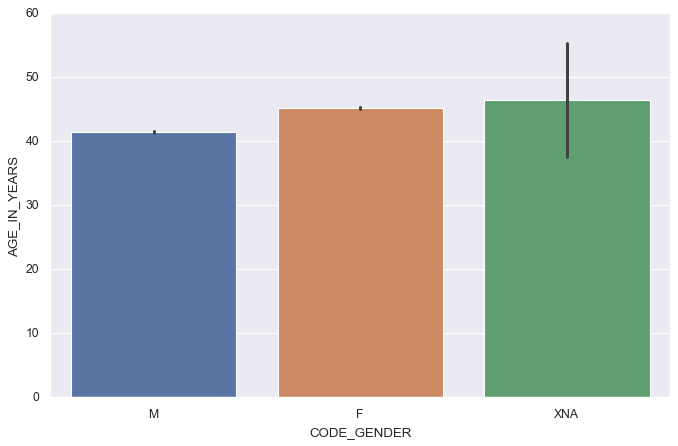

In [174]:

plt.figure(figsize = [10,6])

sns.set(style='darkgrid')
sns.barplot(x = df_application.CODE_GENDER,y = df_application.AGE_IN_YEARS)

plt.show()

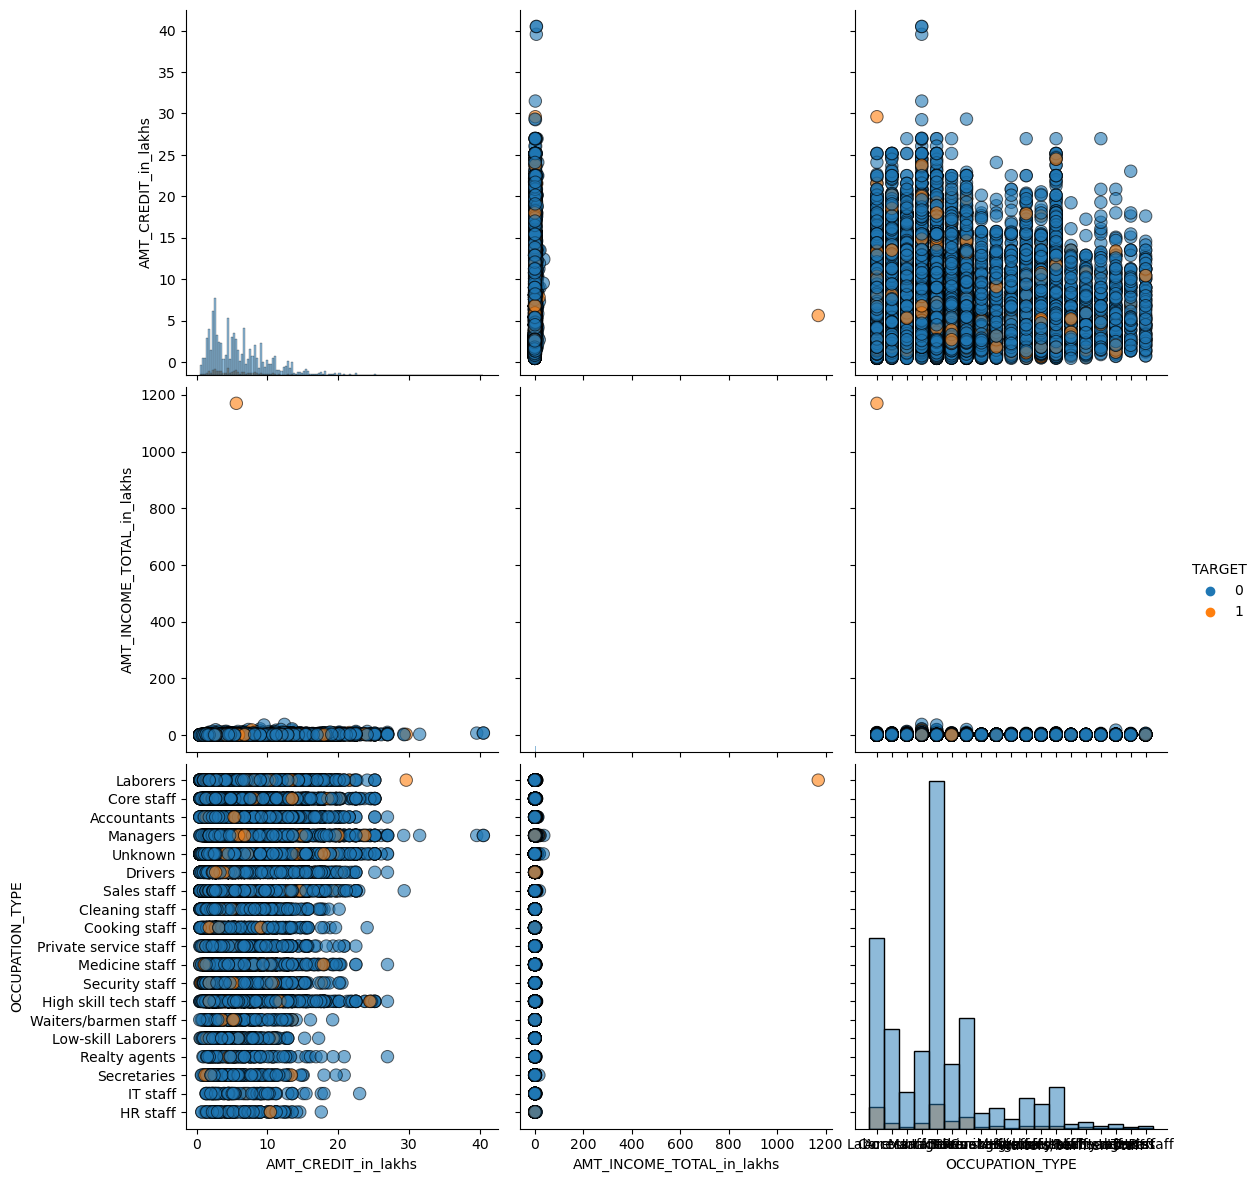

In [123]:
#
sns.pairplot(df_application,vars = ['AMT_CREDIT_in_lakhs','AMT_INCOME_TOTAL_in_lakhs','OCCUPATION_TYPE'],
             diag_kind = 'hist', hue = 'TARGET',
             plot_kws = {'alpha':0.6, 's': 80, 'edgecolor': 'k'},height = 4)
plt.show()

In [ ]:
#
plt.figure(figsize=(25, 5))

sns.heatmap(Tagget_Variable_Payment_Difficulty.corr(),cmap="YlGnBu")
plt.title('Payment_Difficulty')

plt.show()

In [ ]:
# Plot of Heatmap between variables
df_3 = Tagget_Variable_Payment_Difficulty[['CNT_CHILDREN','AMT_ANNUITY','AMT_GOODS_PRICE','AGE_IN_YEARS',
                                           'EMPLOYMENT_YEARS','AMT_INCOME_TOTAL_in_lakhs','AMT_CREDIT_in_lakhs',
                                           'CNT_FAM_MEMBERS','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE',
                                           'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','OCCUPATION_TYPE',
                                           'NAME_HOUSING_TYPE']]
plt.figure(figsize=(25, 5))
sns.heatmap(df_3.corr(method = 'pearson'),cmap = 'YlGnBu',annot=True)
plt.title('Payment_Difficulty')

plt.show()

# ML:

In [ ]:
#df_application.info()


In [ ]:
 pd.set_option('display.max_rows', None)

In [105]:
df_application.isnull().sum()

SK_ID_CURR                   0
TARGET                       0
NAME_CONTRACT_TYPE           0
CODE_GENDER                  0
FLAG_OWN_CAR                 0
                            ..
AMT_INCOME_TOTAL_in_lakhs    0
AMT_CREDIT_in_lakhs          0
AMT_CREDIT_in_lakhs_Range    0
AMT_INCOME_TOTAL_RANGE       1
Credit_Ratio                 0
Length: 82, dtype: int64

In [106]:
df_application_ml=df_application.dropna()

In [107]:
df_application_ml.isnull().sum()

SK_ID_CURR                   0
TARGET                       0
NAME_CONTRACT_TYPE           0
CODE_GENDER                  0
FLAG_OWN_CAR                 0
                            ..
AMT_INCOME_TOTAL_in_lakhs    0
AMT_CREDIT_in_lakhs          0
AMT_CREDIT_in_lakhs_Range    0
AMT_INCOME_TOTAL_RANGE       0
Credit_Ratio                 0
Length: 82, dtype: int64

In [108]:


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
import shap


In [98]:
# Step 1: Data Preparation
# Selecting relevant features
features = ['AGE_IN_YEARS', 'EMPLOYMENT_YEARS', 'AMT_INCOME_TOTAL_in_lakhs', 'AMT_CREDIT_in_lakhs', 'Credit_Ratio', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']
X = df_application_ml[features]

# Target variable (Assuming you have a target variable like 'TARGET' in your dataset)
y = df_application_ml['TARGET']

# Encoding categorical variables
#X = pd.get_dummies(X, drop_first=True)

In [119]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [124]:
#y_train

In [125]:
# Step 2: Model Selection and Training
# Logistic Regression Model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [126]:
# Random Forest Model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [137]:
# Step 3: Model Evaluation
# Logistic Regression Evaluation
y_pred_logreg = logreg.predict(X_test)

from sklearn.metrics import classification_report
print("Logistic Regression Report")
print(classification_report(y_test, y_pred_logreg, zero_division=1))



#print(classification_report(y_test, y_pred_logreg))
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("ROC-AUC:", roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1]))

Logistic Regression Report
              precision    recall  f1-score   support

           0       0.91      1.00      0.96     11272
           1       1.00      0.00      0.00      1050

    accuracy                           0.91     12322
   macro avg       0.96      0.50      0.48     12322
weighted avg       0.92      0.91      0.87     12322

Accuracy: 0.9147865606232755
ROC-AUC: 0.603784176552097


In [128]:
# Random Forest Evaluation
y_pred_rf = rf.predict(X_test)
print("Random Forest Report")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))

Random Forest Report
              precision    recall  f1-score   support

           0       0.91      1.00      0.96     11272
           1       0.25      0.00      0.00      1050

    accuracy                           0.91     12322
   macro avg       0.58      0.50      0.48     12322
weighted avg       0.86      0.91      0.87     12322

Accuracy: 0.9144619379970784
ROC-AUC: 0.5684260620500862


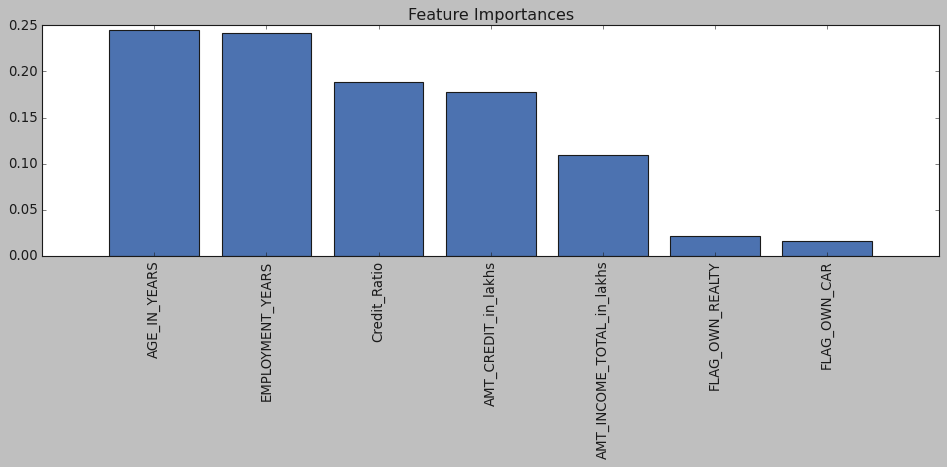

In [131]:
# Step 5: Model Interpretation
# Feature Importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()